# **Importing all the required libraries**

In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings('ignore')

# **Importing Dataset**

In [3]:
# import dataset
data = pd.read_csv('/content/AIDS_Classification.csv')
data

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,1091,3,21,53.2980,1,0,0,100,0,1,...,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,...,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,...,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,...,0,1,0,0,0,166,169,999,1838,1


In [4]:
# Dimensions of the Dataset
data.shape

(2139, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [6]:
data.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [10]:
# Slicing data
X = data.iloc[:, [0, 2]].values
y = data.iloc[:, -1].values
data

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,1091,3,21,53.2980,1,0,0,100,0,1,...,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,...,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,...,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,...,0,1,0,0,0,166,169,999,1838,1


# **Split the data into train and test**

In [13]:
# Split the data into  and test
x = data.drop('drugs',axis = 1)
y = data['drugs']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

In [14]:
print(f"Shape train features :{x_train.shape}")
print(f"Shape train labels :{y_train.shape}")
print(f"Shape test features :{x_test.shape}")
print(f"Shape test labels :{y_test.shape}")

Shape train features :(1711, 22)
Shape train labels :(1711,)
Shape test features :(428, 22)
Shape test labels :(428,)


# **Instantiate the DecisionTreeClassifier model**

In [62]:
# Instantiate the DecisionTreeClassifier model
model = RandomForestClassifier(criterion='gini',random_state=42,n_estimators=100,max_depth=5)
model.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = model.predict(x_test)

In [20]:
#Let check the accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Train accuracy
y_train_predict = model.predict(x_train)
print('Model accuracy for training data : {0:0.2f}%'.format(accuracy_score(y_train,y_train_predict)*100))

# Test accuracy
y_test_predict = model.predict(x_test)
print('Model accuracy for validation data : {0:0.2f}%'.format(accuracy_score(y_test,y_test_predict)*100))

Accuracy: 0.8341121495327103
Model accuracy for training data : 87.73%
Model accuracy for validation data : 83.41%


# **Instantiate the DecisionTreeClassifier model (With n_estimator = 10**

In [61]:
# Instantiate the DecisionTreeClassifier model
model = RandomForestClassifier(criterion='gini',random_state=45,n_estimators=5,max_depth=5)
model.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = model.predict(x_test)

In [38]:
#Let check the accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Train accuracy
y_train_predict = model.predict(x_train)
print('Model accuracy for training data : {0:0.2f}%'.format(accuracy_score(y_train,y_train_predict)*100))

# Test accuracy
y_test_predict = model.predict(x_test)
print('Model accuracy for validation data : {0:0.2f}%'.format(accuracy_score(y_test,y_test_predict)*100))

Accuracy: 0.8341121495327103
Model accuracy for training data : 88.19%
Model accuracy for validation data : 83.41%


# **Evaluating our test dataset**

In [80]:
print('Precision, Recall and f1-score : \n',classification_report(y_test,y_pred))
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))

Precision, Recall and f1-score : 
               precision    recall  f1-score   support

          70       0.00      0.00      0.00         2
          80       0.00      0.00      0.00        17
          90       0.33      0.04      0.07       152
         100       0.60      0.96      0.74       257

    accuracy                           0.59       428
   macro avg       0.23      0.25      0.20       428
weighted avg       0.48      0.59      0.47       428

Confusion Matrix : 
 [[  0   0   1   1]
 [  0   0   1  16]
 [  0   0   6 146]
 [  0   0  10 247]]


# **Printing the Confusion Matrix**

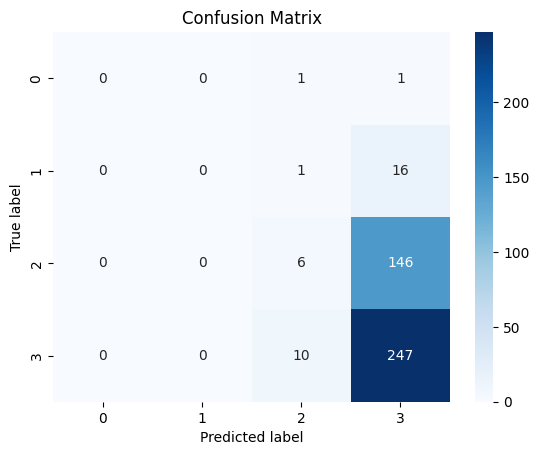

In [81]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [82]:
# Convert y_test and y_pred to binary values
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)
y_pred_binary = lb.transform(y_pred)

# Calculate the ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_binary[:, 1] , y_pred_binary[:, 1])


# Print the results
print("FPR :", fpr_dt)
print("TPR :", tpr_dt)
print("Threshold :", thresholds_dt)

FPR : [0. 1.]
TPR : [0. 1.]
Threshold : [1 0]


In [83]:
auc_score_dt = auc(fpr_dt,tpr_dt)
print('AUC score : ',auc_score_dt)
print('AUC score in % :{0:0.2f}%'.format(auc_score_dt*100))

AUC score :  0.5
AUC score in % :50.00%


In [84]:
def plot_roc_curve(fpr, tpr):
  plt.figure(figsize=(7.5,7.5))
  plt.plot(fpr_dt, tpr_dt, color='green', label='AUC = %0.2f' % auc_score_dt)
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

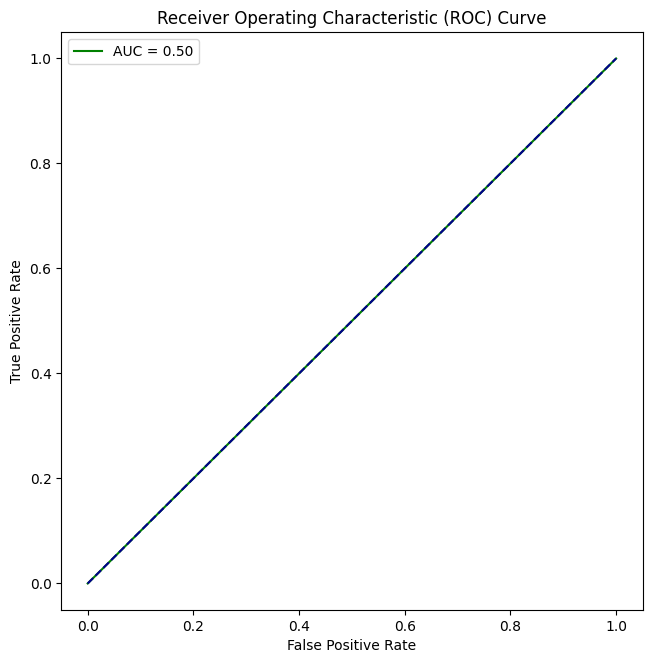

In [85]:
plot_roc_curve(fpr_dt,tpr_dt)

# **Data Visulaization**

<Axes: >

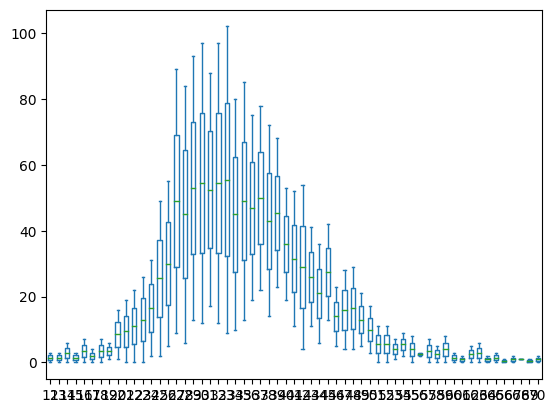

In [103]:
# Using Crosstab Bar
pd.crosstab(data.drugs,data.age).plot(kind="box")

<Axes: xlabel='time'>

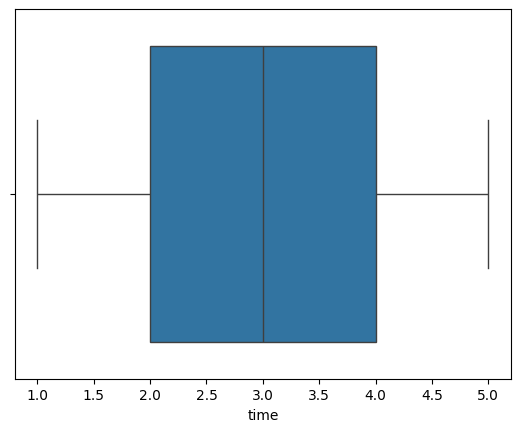

In [116]:
# Example: Create a DataFrame named 'df'
df = pd.DataFrame({'time': [1, 2, 3, 4, 5]})
sns.boxplot(x=df['time'])